## Perceptron Model
-----------------------------------------------

Implementation of a perceptron model - single artificial neuron learning model- using numpy,
tested on a binary classification problem using a syntetic linearly separable data set generated with sklearn.dataset module.

-----------------------------------------------

**Parameters**

- **input_shape** (*int*):  Number of neurons in the input layer. Should be equatl to the number of input variables.






In [2]:
class perceptron():
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.weights = np.random.normal( 0, 1, self.input_shape +1 )

    def activate(self, input_sample):
        bias = self.weights[0]
        output = np.dot( self.weights[1:], input_sample) + bias
        activation = 1.0 if output >= 0.0 else 0.0
        return activation, output
    
    def loss(self, y, activation):
        return ( y - activation)**2
   
    def dloss_w(self, y, activation, x):
        return -2*(y - activation)*x
    
    def dloss_b(self, y, activation):
        return -2*(y - activation)
    
    def update_weights(self, eta, y, x, activation):
        self.weights[0] = self.weights[0] - eta* self.dloss_b(y,activation)
        self.weights[1:] = self.weights[1:] - eta*self.dloss_w(y,activation,x)
        
    def train_model(self, X, y, eta, epochs):
        acc_hist = []
        cost_hist = []
        for epoch in range(epochs+1):
            cost = 0.0
            count = 0.0
            for i, sample in enumerate(X):
                activation_i, output_i = self.activate(sample)
                cost += self.loss(y[i], activation_i)
                self.update_weights( eta,y[i],sample, activation_i)
                count+= 1 if (activation_i) == y[i] else 0
            accuracy = count/len(X)
            acc_hist.append(accuracy)
            cost_hist.append(cost)
            if epoch%100==0:
                print(f'epoch: {epoch} \t cost: {cost} \t accuracy: {accuracy}')
        
        
        print(self.weights)
        return self.weights, cost_hist, acc_hist
                    
    def predict(self, X_test):
        prediction_output = []
        for i,sample in enumerate(X_test):
            activation_i, output_i = self.activate(sample)
            prediction_output.append(activation_i)
        return prediction_output
        
        

## Test 1

Syntetic linearly separable data set with 2 classes.

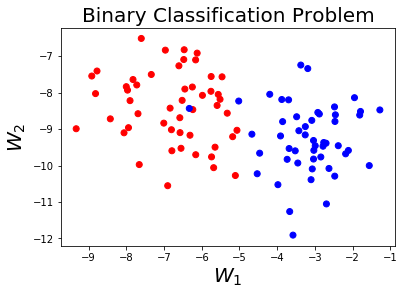

In [9]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=100 ,n_features=2, centers = 2)
colors = ['red', 'blue']
cmap= ListedColormap(colors)
plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
plt.xlabel(r'$W_1$', fontsize=20)
plt.ylabel(r'$W_2$', fontsize=20)
plt.title('Binary Classification Problem', fontsize=20)
plt.savefig('classes_perceptron.png')
plt.show()

## Model training

In [10]:
model  = perceptron (len(X[0]))
iters = 200
eta = 0.01

w , cost , acc = model.train_model(X, y, eta, iters)

epoch: 0 	 cost: 28.0 	 accuracy: 0.72
epoch: 100 	 cost: 10.0 	 accuracy: 0.9
epoch: 200 	 cost: 10.0 	 accuracy: 0.9
[ 1.63016985  1.3908968  -0.5801208 ]


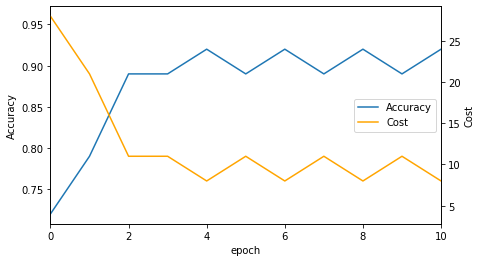

In [11]:
fig,ax = plt.subplots(figsize=(7,4))
ax2 = ax.twinx()
a = ax.plot( np.arange(iters+1), acc, label = 'Accuracy')
b = ax2.plot( np.arange(iters+1), cost, c='orange', label = 'Cost')
join_plot = a+b
labs = [l.get_label() for l in join_plot]
ax.legend(join_plot, labs, loc='center right')
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Cost');
ax.set_xlim(0,10)
fig.savefig('hist_perceptron.png')

## Decision boundary

Predicted decision boundary given by the perceptron model over the tested data set.

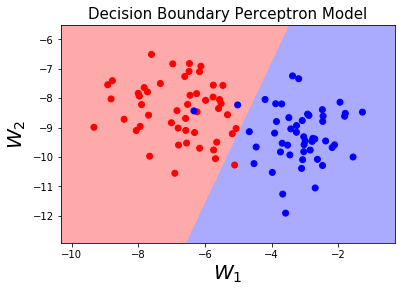

In [12]:
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1

h = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = np.array( model.predict( np.c_[xx.ravel(), yy.ravel()]) )
Z = Z.reshape(xx.shape) 

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])

fig,ax = plt.subplots()
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap)
ax.set_title('Decision Boundary Perceptron Model',fontsize=15)
ax.set_xlabel(r'$W_1$', fontsize=20)
ax.set_ylabel(r'$W_2$', fontsize=20)
plt.show();
fig.savefig('boundary_perceptron1.png')